# HealthCare Lab (Generalized Linear Models-Binary Data)

**Learning Objectives:**
  * Define and fit generalized linear models for binary data
  * Gain exposure to healthcare related DataSets

## Context of the Analysis

### World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using GLMs for binary data.



### About this file

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The objective of the analysis is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.



### Data description is as follows;

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

####  Demographic:

* sex: male or female (Nominal)
* education: level of education attained (Nominal)

* age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

* currentSmoker: whether or not the patient is a current smoker (Nominal)

* cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

#### Medical( history):

* BPMeds: whether or not the patient was on blood pressure medication (Nominal)

* prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

* prevalentHyp: whether or not the patient was hypertensive (Nominal)

* diabetes: whether or not the patient had diabetes (Nominal)

#### Medical(current):

* totChol: total cholesterol level (Continuous)

* sysBP: systolic blood pressure (Continuous)

* diaBP: diastolic blood pressure (Continuous)

* BMI: Body Mass Index (Continuous)

* heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

* glucose: glucose level (Continuous)

#### Predict variable (desired target):

* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



## 1. Library Import

In [1]:

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import warnings

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/framingham_healthcare.csv")


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
Data.sample(3).T

,1900,1970,3258
male,0.00,0.00,1.00
age,39.00,46.00,50.00
education,2.00,2.00,NaN
currentSmoker,1.00,0.00,0.00
cigsPerDay,1.00,0.00,0.00
BPMeds,0.00,0.00,0.00
prevalentStroke,0.00,0.00,0.00
prevalentHyp,0.00,0.00,0.00
diabetes,0.00,0.00,0.00
totChol,225.00,212.00,268.00


In [6]:
Data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## 3. Data Transformation

### We don't perform any data transformation. I ML contexts it would be advisable to standarize factors (e.g. z-scoring).

## 4. Exploratory Data Analysis

In [7]:
Data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Impact of quantitative factors on the response.

In [8]:
quantitativefactorsToExplore=['age','cigsPerDay','totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

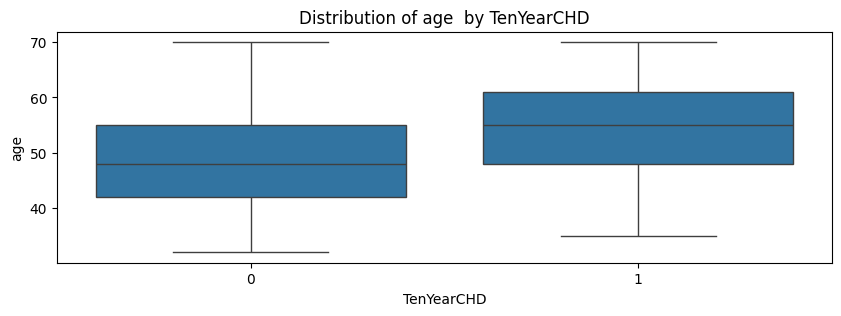

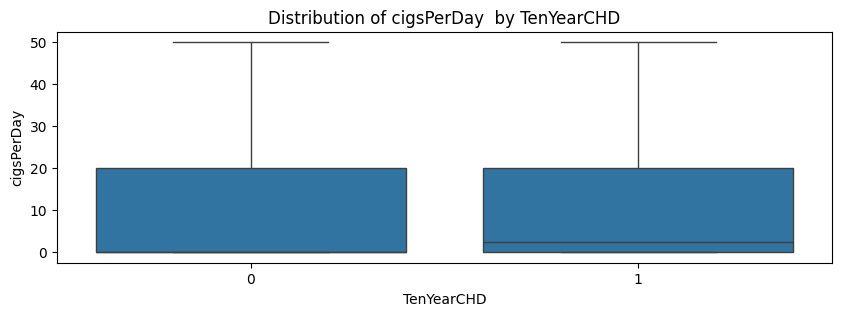

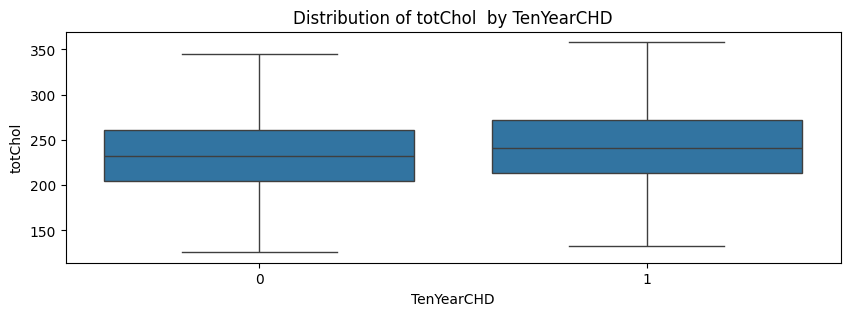

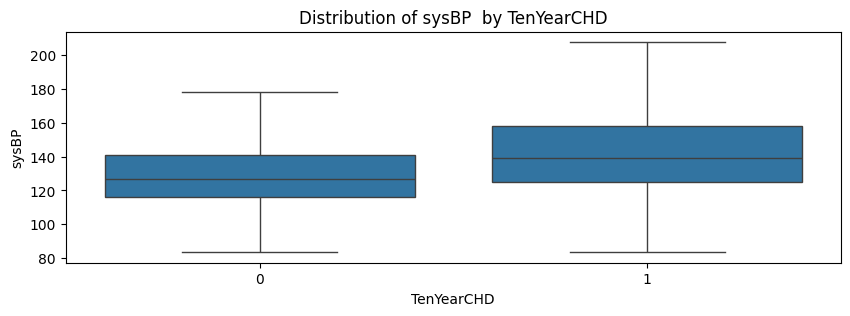

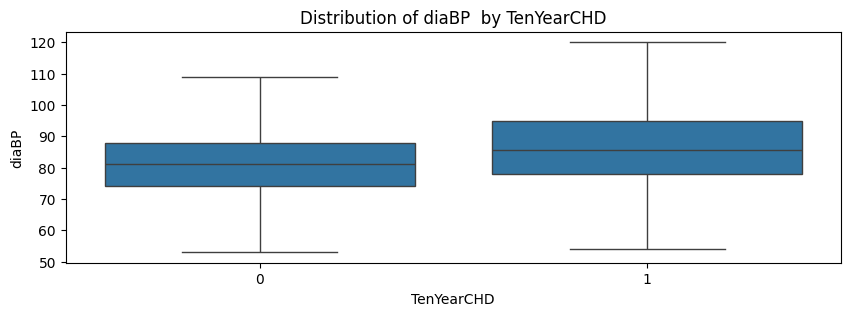

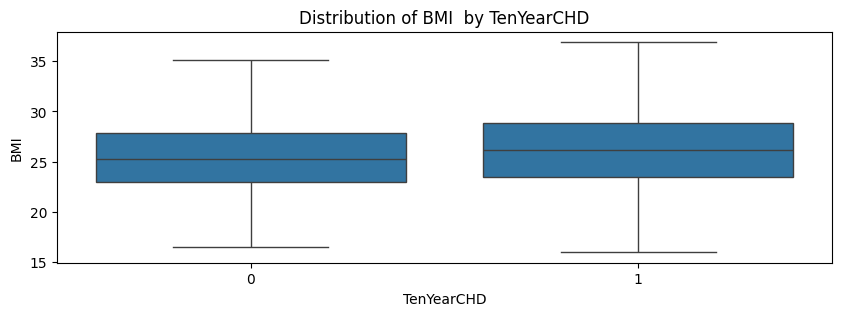

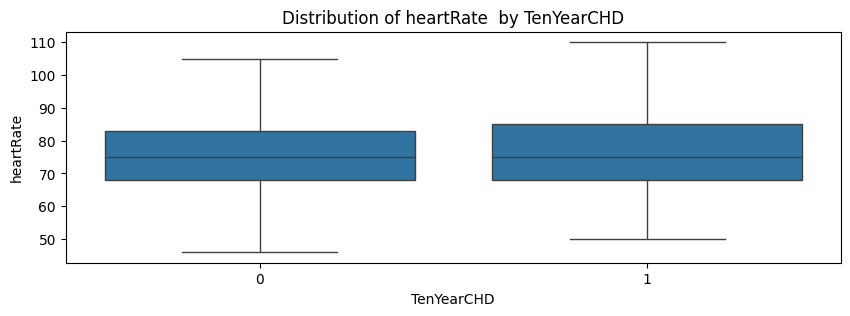

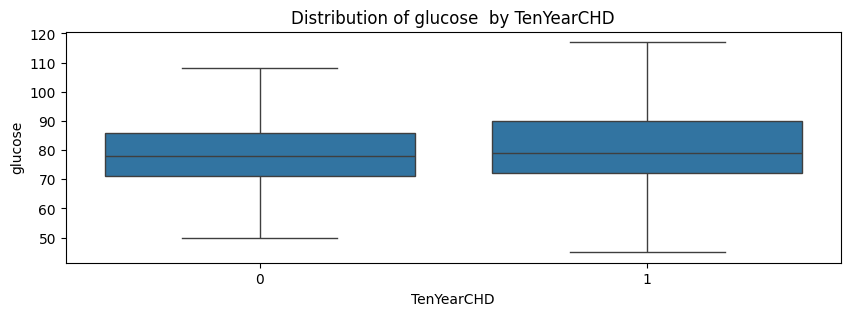

In [9]:
for factor in quantitativefactorsToExplore:
  plt.figure(figsize=(10, 3))
  sns.boxplot(x='TenYearCHD', y=factor, data=Data, showfliers=False)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by TenYearCHD')
  plt.show()

### Impact of qualitative factors on the response.

In [10]:
Data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
qualitativeFactorstoExplore=['male','education','currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

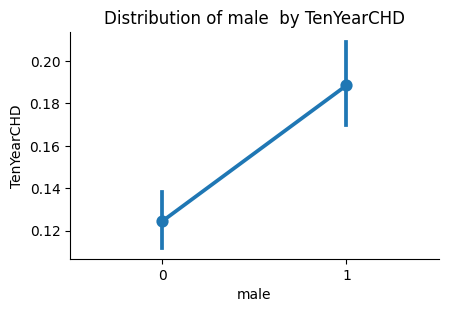

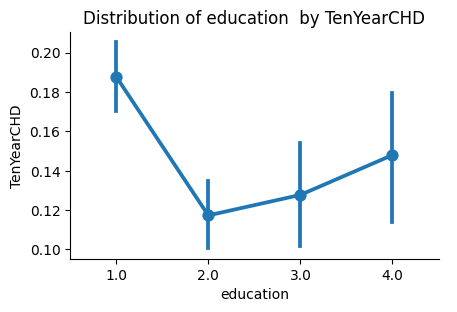

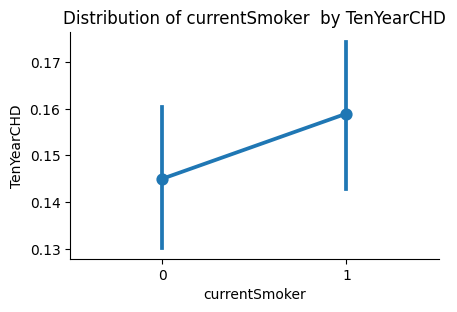

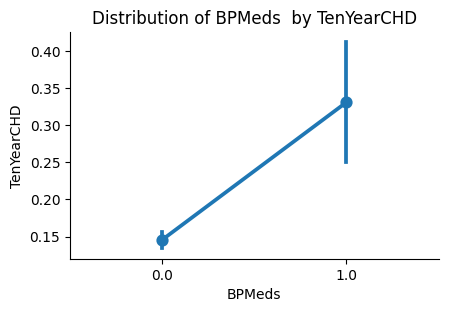

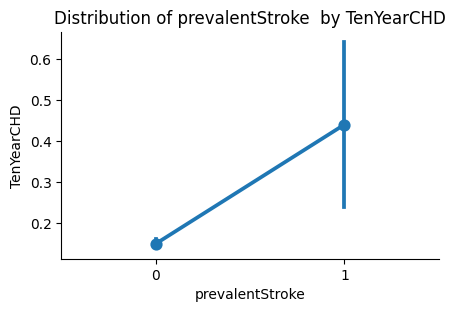

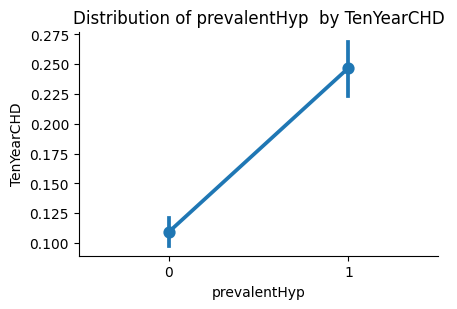

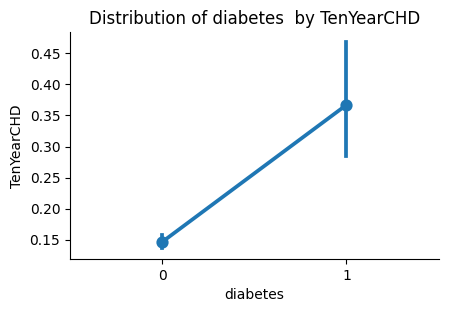

In [12]:
for factor in qualitativeFactorstoExplore:

  sns.catplot(data=Data, x=factor, y="TenYearCHD", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by TenYearCHD')
  plt.show()



### From the previous Analyses we conclude that some factors, both qualitative and quantitative, seem to have an impact of the reponse (propensity of the subject to suffer a heart attack)

## 5. What drives subject's propensity to experience a hearth attack ?
### We want to explore the impact of each factor on the response.
#### Given that the response is binary (Yes/No) we fit a GLM Binomial model.


#### We will assume that the random variable approve follows a binomial distribution
$Y_i\sim Binomial(n,p)$


#### We assume a logit function, this means that we are assuming that the log odds of the outcome can be modeled as a linear combination of the factors under consideration.

$ logit(P(approve=1))=log(\frac{P(approve=1)}{P(approve=0)})=\beta_0+\beta_1*X_1+\ldots+\beta_p*X_p $

### 5.1. Estimation of the parameters


In [13]:
Data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
Data.sample(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
614,0,52,2.0,1,20.0,0.0,0,0,0,244.0,127.5,72.5,24.29,67.0,118.0,0
611,0,35,2.0,0,0.0,0.0,0,0,0,170.0,98.5,69.5,19.64,71.0,77.0,0
2436,0,50,2.0,1,9.0,0.0,0,1,0,161.0,145.0,89.0,20.30,66.0,81.0,0


In [15]:
formulaExpression='TenYearCHD ~male+age+education+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose'

In [16]:
reg = smf.glm(formula=formulaExpression,family=sm.families.Binomial(),data=Data)



# We fit the model
results = reg.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                            GLM   Df Residuals:                     3642
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.2
Date:                Fri, 04 Oct 2024   Deviance:                       2754.5
Time:                        08:06:53   Pearson chi2:                 3.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09539
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

We observe in the previous table that not all factors are statistically significant (p-values larger than 0.005). We remove those and fit a new simplified model.

In [18]:
formulaExpressionSimplified='TenYearCHD ~male+age+cigsPerDay+prevalentHyp+totChol+sysBP+glucose'

In [19]:
reg2 = smf.glm(formula=formulaExpressionSimplified,family=sm.families.Binomial(),data=Data)



# We fit the model
results2 = reg2.fit()

In [20]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3817
Model:                            GLM   Df Residuals:                     3809
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.7
Date:                Fri, 04 Oct 2024   Deviance:                       2905.4
Time:                        08:06:53   Pearson chi2:                 3.83e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09592
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.7768      0.509    -17.256      0.000      -9.774      -7.780
male             0.5417      0.104      5.208      0.000       0.338       0.746
age              0.0665      0.006     10.634      0.000       0.054       0.079
cigsPerDay       0.0201      0.004      4.930      0.000       0.012       0.028
prevalentHyp     0.2374      0.131      1.806      0.071      -0.020       0.495
totChol          0.0024      0.001      2.285      0.022       0.000       0.004
sysBP            0.0136      0.003      4.887      0.000       0.008       0.019
glucose          0.0077      0.002      4.669      0.000       0.004       0.011
================================================================================
"""

## 6. Model interpretation:

#### We have fitted the following model:

$ logit(P(TenYearCHD=1))=log(\frac{P(TenYearCHD=1)}{P(TenYearCHD=0)})=-8.77+0.54*male+0.066*age+0.0201*cigsPerDay+0.0024*totChol+0.0136*sysBP+0.007*glucose$

\\
#### All the factors considered in the final model increase the log odds of the response variable 'TenYearCHD'.

#### Given the coefficient for the male factor (0.54), we conclude that the log odds increase by 0.54 if the subject is a male. It is possible to compute the odds ratio by exponentiating the coefficient, in this case $e^{0.54}=1.71$, this means that being male is associated with a 71% increase in the odds of the response: '10-year risk of coronary heart disease'


#### Given the coefficient for the age factor (0.066), we conclude that the log odds increase by 0.066 for every additional year of age.. It is possible to compute the odds ratio by exponentiating the coefficient, in this case $e^{0.0665}=1.068$, this means that an additional year is associated with a 0.068% increase in the odds of the response: '10-year risk of coronary heart disease'




